In [12]:
import tensorflow as ts
from tensorflow.keras.models import load_model
import keras as kr
from keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt
(train_in_pre, train_out_pre), (test_in_pre, test_out_pre) = mnist.load_data()

all_input = []
all_output = []
test_in = []
test_out = []




In [13]:
def inpconv(old, length):
    newl = []
    for i in range (int(length//2)):
        for j in range (int(length//2)):
            n = int(old[2*i+1][2*j+1]) + int(old[2*i+1][2*j]) + int(old[2*i][2*j+1]) + int(old[2*i][2*j])
            if (n > 350):
                newl += [1]
            else:
                newl += [0]
    return newl


if not type(train_in_pre) == list:
    train_in_pre = train_in_pre.tolist()
for i in range(int(len(train_in_pre))):
    all_input += [inpconv(train_in_pre[i], 28)]#lista list pikseli w obrazku

if not type(test_in_pre) == list:
    test_in_pre = test_in_pre.tolist()
for i in range(int(len(test_in_pre))):
    test_in += [inpconv(test_in_pre[i], 28)]

    
for i in range(len(train_out_pre)):
    all_output += [[(1 if train_out_pre[i] == j else 0) for j in range(10)]]

for i in range(len(test_out_pre)):
    test_out += [[(1 if test_out_pre[i] == j else 0) for j in range(10)]]
    
val_in = all_input[0:750]
train_in = all_input[750:7500]
val_out = all_output[0:750]
train_out = all_output[750:7500]

In [14]:
#this shows us the image from the combined pixels
def plot_digit(image):
    pixels = []
    for i in range(14):
        pixels += [image[14*i : 14*(i+1)]]

    plt.figure()
    plt.imshow(pixels)
    plt.colorbar()
    plt.grid(False)
    plt.show()


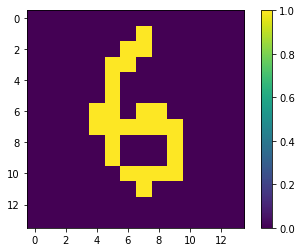

[[  0.02029853  -5.9244413   -0.3871919   -9.928994    -4.668625
   -2.9940405    6.090712   -14.956843     0.39036363  -8.031038  ]] None
313/313 - 0s - loss: 0.5298 - binary_accuracy: 0.9595


In [17]:
#this creates a neural layer
model = load_model('my_model.h5')

print(model.predict([test_in[21]]), plot_digit(test_in[21]))

test_loss, test_acc = model.evaluate(test_in, test_out, verbose=2)